# HR Analytics Project- Understanding the Attrition in HR

### Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

### HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

### Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

### Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv", sep=None)

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

### Observation:-
1. There are 35 Feature/ variable in this column, 
2. Attrition is target variable.

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
pd.set_option('display.max_column',40)

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Observation:-
1. EmployeeCount and StandardHours column has same value in all row, its mean median,min and max are showing same value, hence we can remove these two columns.
2. Count of all the columns showing same value, we can say there is no missing value in dataset.
3. Mean and Max values has no abnormal difference, hence we can say there is no outlier, there could be some value which will be higher, but those could be valid data.

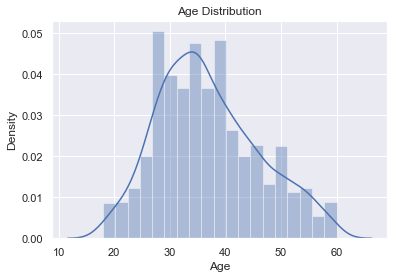

In [9]:
sns.set()
sns.distplot(df['Age'])
plt.title("Age Distribution")
plt.show()

### Observation:-
Maximum Employee working in company belongs to age group 25 to 40 year.

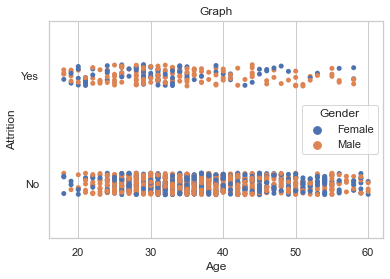

In [10]:
sns.set(style="whitegrid")
ax = sns.stripplot(y='Attrition',x ='Age', hue="Gender",data=df)
plt.title('Graph')
plt.show()

### Observation:-
1. Young employee(age between 25y to 35y) attrition is comparativly high.
2. Male eomployee of young age contributed more in attrition.

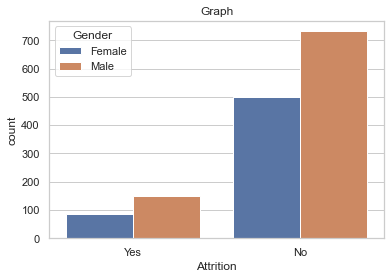

In [11]:
sns.set(style="whitegrid")
ax = sns.countplot(x='Attrition',hue="Gender",data=df)
plt.title('Graph')
plt.show()

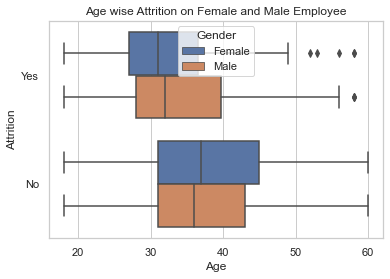

In [12]:
sns.boxplot(df['Age'],df['Attrition'],df['Gender'])
plt.title("Age wise Attrition on Female and Male Employee")
plt.show()



### Observation:-
Attrition in male employee is comparativly higher then female employee of same group.

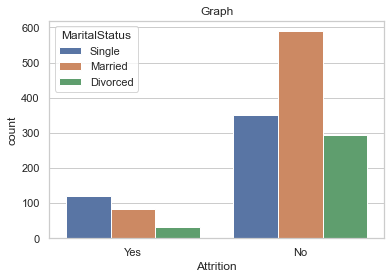

In [13]:
sns.set(style="whitegrid")
ax = sns.countplot(x='Attrition',hue="MaritalStatus",data=df)
plt.title('Graph')
plt.show()

### Observation:-
1. Single Employee change job more frequently.
2. Married Employee stay in company comparativly longer then single and divorced employee.

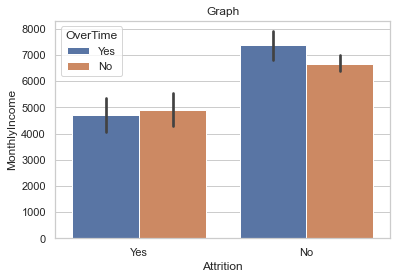

In [14]:
sns.set(style="whitegrid")
sns.barplot(y = 'MonthlyIncome',x='Attrition',hue = 'OverTime', data=df)
plt.title('Graph')
plt.show()

### Observation:-
Employee who are getting overtime has more supected to leave company.

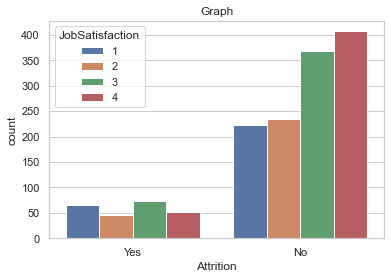

In [15]:
sns.set(style="whitegrid")
#ax = sns.barplot(x='Attrition', y='Age',hue="JobSatisfaction",data=df)
ax = sns.countplot(x='Attrition',hue="JobSatisfaction",data=df)
plt.title('Graph')
plt.show()

### Observation:- 
Job Setifaction level 1 and 3 has comparativly high Attrition.

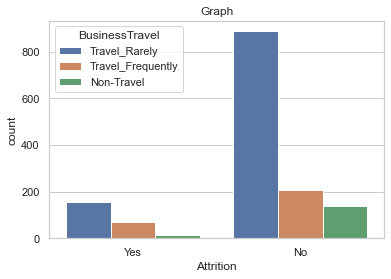

In [16]:
#sns.boxplot(df['Age'],df['Attrition'],df['BusinessTravel'])

sns.set(style="whitegrid")
#ax = sns.barplot(x='Attrition', y='Age',hue="JobSatisfaction",data=df)
ax = sns.countplot(x='Attrition',hue="BusinessTravel",data=df)
plt.title('Graph')
plt.show()

### Observation:-
Employee who get Rare travel opportunity leave company more frequently.

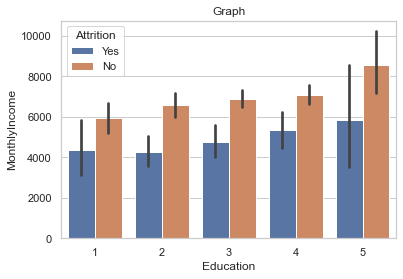

In [17]:
sns.set(style="whitegrid")
#ax = sns.barplot(x='Attrition', y='Age',hue="JobSatisfaction",data=df)
ax = sns.barplot(x='Education', y = 'MonthlyIncome',hue="Attrition",data=df)
plt.title('Graph')
plt.show()

### Observation:-
If we assume that Education field show 5 for higher education and 1 for lower education level.
1. Higher the education, Attrition will be high.
2. Above graph also show anther observation that if a Higher education employee getting less salary then  Attrition probability will be high.
3. most of the time Employee getting lower salary as compare to other employee with same education level have high Attrition rate.

In [18]:
df.head(200)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,37,No,Travel_Rarely,290,Research & Development,21,3,Life Sciences,1,267,2,Male,65,4,1,Research Scientist,1,Married,3564,22977,1,Y,Yes,12,3,1,80,1,8,3,2,8,7,1,7
196,35,No,Travel_Frequently,138,Research & Development,2,3,Medical,1,269,2,Female,37,3,2,Laboratory Technician,2,Single,4425,15986,5,Y,No,11,3,4,80,0,10,5,3,6,2,1,2
197,42,No,Non-Travel,926,Research & Development,21,2,Medical,1,270,3,Female,36,3,2,Manufacturing Director,3,Divorced,5265,16439,2,Y,No,16,3,2,80,1,11,5,3,5,3,0,2
198,38,No,Travel_Rarely,1261,Research & Development,2,4,Life Sciences,1,271,4,Male,88,3,2,Manufacturing Director,3,Married,6553,7259,9,Y,No,14,3,2,80,0,14,3,3,1,0,0,0


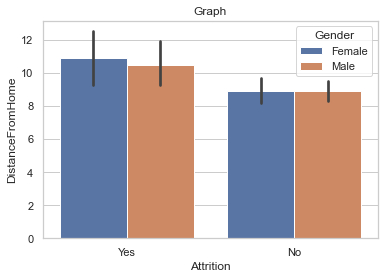

In [19]:
sns.set(style="whitegrid")
#ax = sns.barplot(x='Attrition', y='Age',hue="JobSatisfaction",data=df)
ax = sns.barplot(x='Attrition', y = 'DistanceFromHome',hue="Gender",data=df)
plt.title('Graph')
plt.show()

### Observation:-
1. Distance from from has key contributor in higher attrition.
2. Employee if spending more time in trevel then probability of attrition for those employee will be high.
3. Female employee treveling from distance have to leave company more freqently.

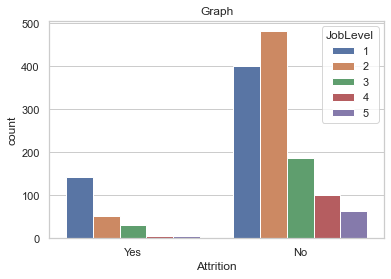

In [20]:
sns.set(style="whitegrid")
#ax = sns.barplot(x='Attrition', y='Age',hue="JobSatisfaction",data=df)
ax = sns.countplot(x='Attrition', hue="JobLevel",data=df)
plt.title('Graph')
plt.show()

### Observation:-
1. Employee on Job Level 1 has higher Attrition as compare to other Job level. 

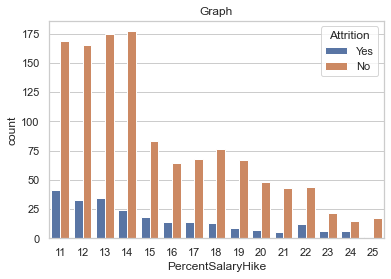

In [21]:
sns.set(style="whitegrid")
#ax = sns.barplot(x='Attrition', y='Age',hue="JobSatisfaction",data=df)
ax = sns.countplot(hue='Attrition',x="PercentSalaryHike",data=df)
plt.title('Graph')
plt.show()

### Observation:-

Low salary hike is also cause Attrition, we can see, maximum employee leaving company has salary hike % 11 to 14%, also maximum employee getting hike in this range only

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

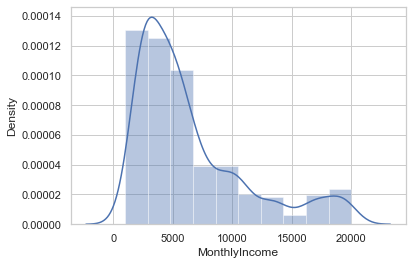

In [22]:
sns.distplot(df['MonthlyIncome'], bins=10)

### Observation:-
1. MonthlyIncome veriable is skewed data.
2. Maximum employee getting 1250 to 7500 per monh.

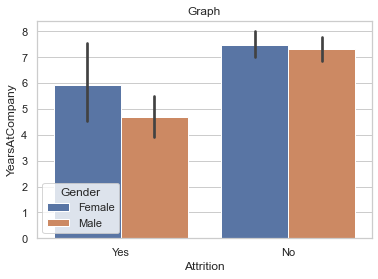

In [23]:
sns.set(style="whitegrid")
#ax = sns.barplot(x='Attrition', y='Age',hue="JobSatisfaction",data=df)
ax = sns.barplot(y='YearsAtCompany', x = 'Attrition',hue="Gender",data=df)
plt.title('Graph')
plt.show()

### Observation:-
Female employee stay in company much longer before leaving it. 


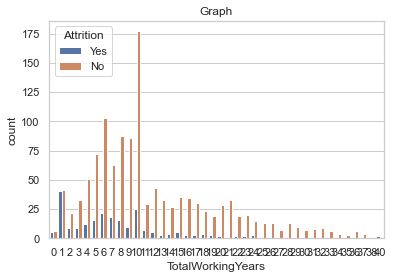

In [24]:
sns.set(style="whitegrid")
#ax = sns.barplot(x='Attrition', y='Age',hue="JobSatisfaction",data=df)
ax = sns.countplot(x='TotalWorkingYears', hue="Attrition",data=df)
plt.title('Graph')
plt.show()

# Observation:- 
Highest no of attrition occuress with one year of working time of employee in a company. that is why company offers lots of joining bonus and other feciolity which will be recovered if employee leave the company with one year.

### Observation:- 
Recently promoted employee 

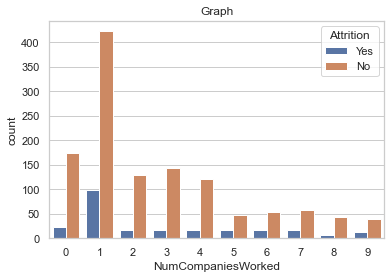

In [25]:
sns.set(style="whitegrid")
#ax = sns.barplot(x='Attrition', y='Age',hue="JobSatisfaction",data=df)
ax = sns.countplot(x='NumCompaniesWorked', hue="Attrition",data=df)
plt.title('Graph')
plt.show()


### Observation:-
Fresher employee who joined company firsttime has higher Attrition.

# Data Cleanup

In [26]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [27]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
column = ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole', 'MaritalStatus','Over18','OverTime']
for val in column:
    df[val]= le.fit_transform(df[val].astype(str))  

In [28]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2


In [29]:
df.shape

(1470, 35)

In [30]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,2.721769,0.600000,65.891156,2.729932,2.063946,4.458503,2.728571,1.097279,6502.931293,14313.103401,2.693197,0.0,0.282993,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,1.093082,0.490065,20.329428,0.711561,1.106940,2.461821,1.102846,0.730121,4707.956783,7117.786044,2.498009,0.0,0.450606,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,1.000000,0.000000,30.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1009.000000,2094.000000,0.000000,0.0,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,2.000000,0.000000,48.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2911.000000,8047.000000,1.000000,0.0,0.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,3.000000,1.000000,66.000000,3.000000,2.000000,5.000000,3.000000,1.000000,4919.000000,14235.500000,2.000000,0.0,0.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,4.000000,1.000000,83.750000,3.000000,3.000000,7.000000,4.000000,2.000000,8379.000000,20461.500000,4.000000,0.0,1.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,4.000000,1.000000,100.000000,4.000000,5.000000,8.000000,4.000000,2.000000,19999.000000,26999.000000,9.000000,0.0,1.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Observation:-

1. EmployeeCount, Over18, StandardHours columns same value for all the rows.hence we can delete them.
2. EmployeeNumber is a unique value assigned to every employee, this variable can be removed from data set.
2. there is not no missing value.
3. there are outlier exist in data set for some columns but these values are very near to whishker hence we can ignore them.

<function matplotlib.pyplot.show(close=None, block=None)>

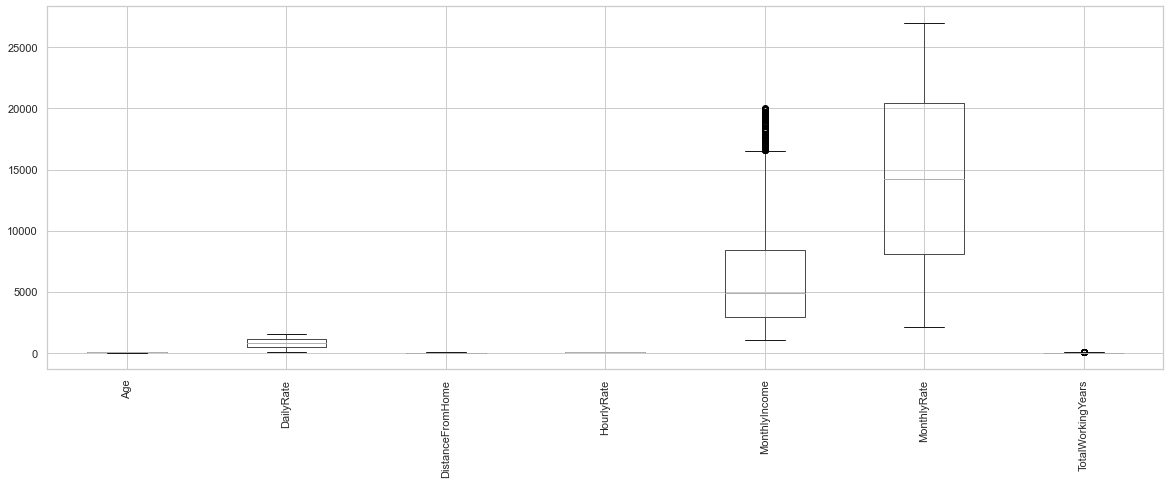

In [31]:
ncol=12
nrows=10
collist = ['Age','DailyRate','DistanceFromHome', 'HourlyRate','MonthlyIncome', 'MonthlyRate','TotalWorkingYears']
df_col = df.loc[:,['Age','DailyRate','DistanceFromHome', 'HourlyRate','MonthlyIncome', 'MonthlyRate','TotalWorkingYears']]
df_col.boxplot(figsize=[20,8])
plt.xticks(rotation = 90)
plt.subplots_adjust(bottom=0.25)
plt.show

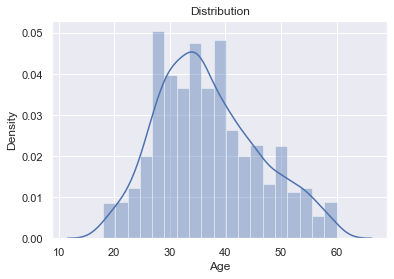

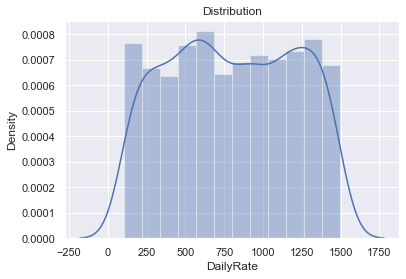

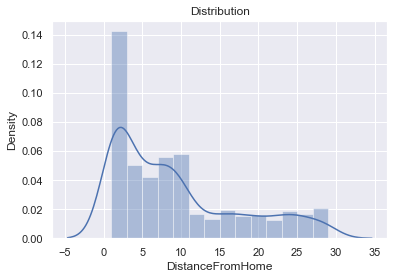

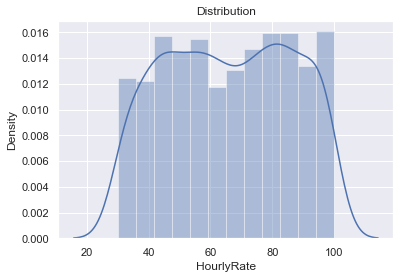

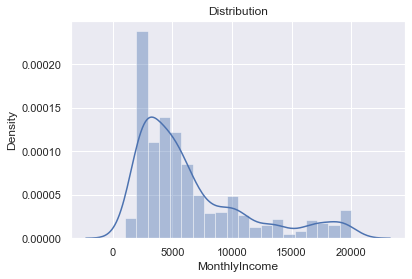

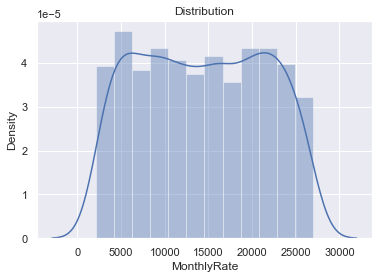

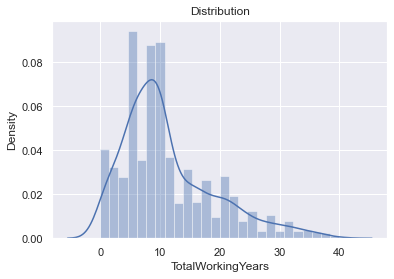

In [32]:
sns.set()
for i in collist:
    sns.distplot(df[i])
    plt.title("Distribution")
    plt.show()

### Observation:-
Distencefromhome, Monthlyincome and TotalworkingYears has some skewness, we will normalize this data and see if this skewness gets resolves or not.

<AxesSubplot:xlabel='Attrition', ylabel='count'>

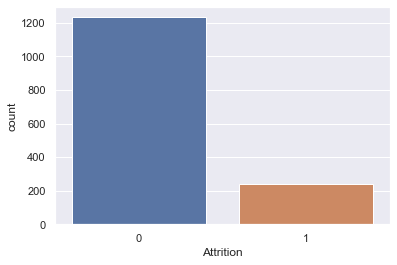

In [33]:
sns.countplot(x='Attrition', data=df)

### Observation:- 

Data is imbalance, hence we have to use oversampling to resolve data imbalance issue.

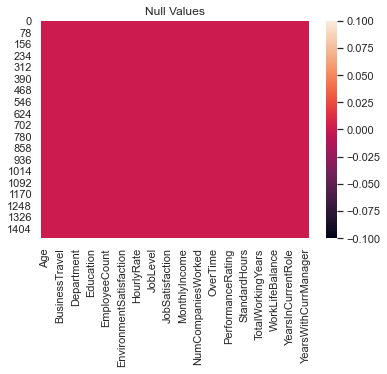

In [34]:
# Check for null value.
import matplotlib.pyplot as plt
plt.figure()
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

### Observation:- Data has no null value.


In [35]:
#EmployeeCount, Over18, StandardHours columns same value for all the rows.hence we can delete them.
#EmployeeNumber is a unique value assigned to every employee, this variable can be removed from data set.

df_new = df.drop(['EmployeeCount', 'Over18', 'StandardHours','EmployeeNumber'], axis=1)
df_new.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


Text(0.5, 1.0, 'Correlation Matrix')

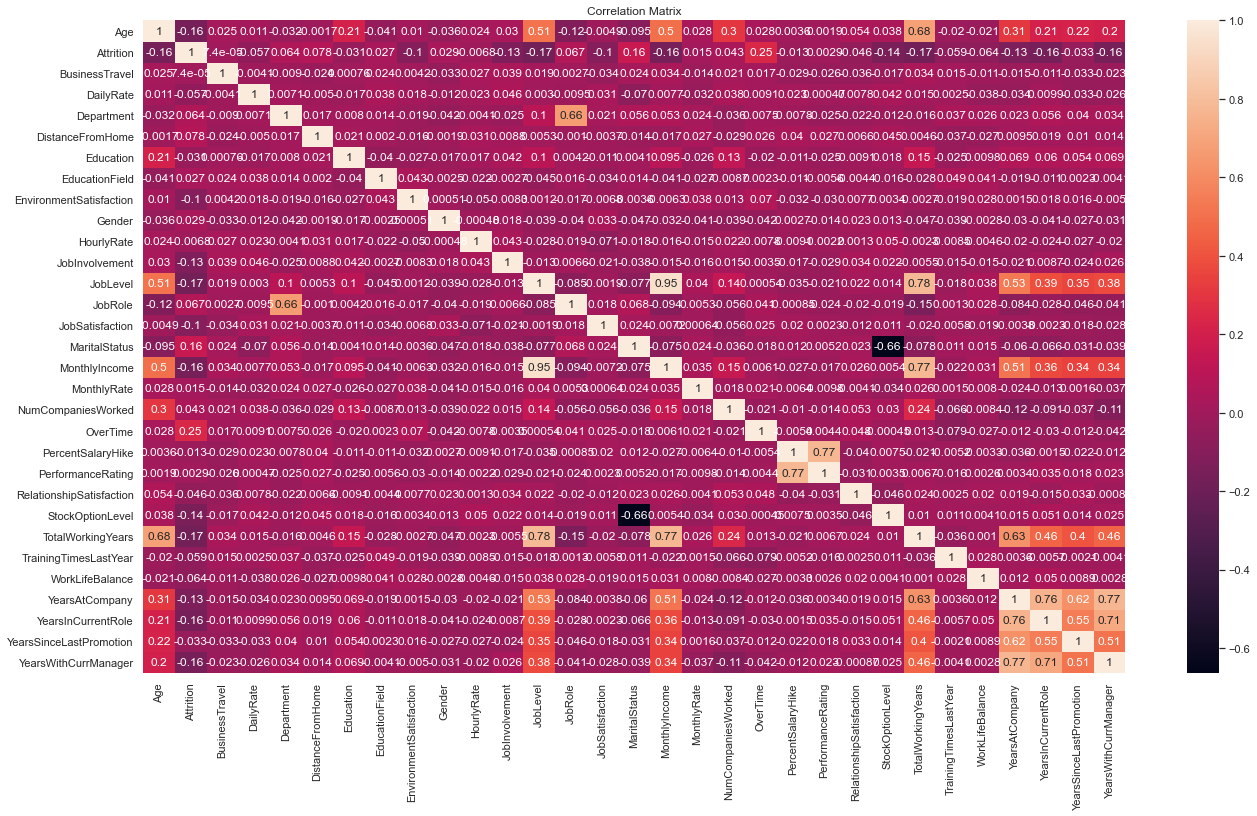

In [36]:
plt.figure(figsize=[22,12])
sns.heatmap(df_new.corr(),annot=True)
plt.title("Correlation Matrix")

In [37]:
corr_matrix = df.corr()
corr_matrix['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
A

### Observation:-
1. Attrition (target variable) has strong possitive correlation with OverTime and Marital Status.means if over time increases then attrition will also increase.
2. some columns (BusinessTravel, HourlyRate, PerformanceRating) are week possitive correlation with target.
3. TotalWorkingYears, JobLevel, YearsInCurrentRole, MonthlyIncome, Age, YearsWithCurrManager,StockOptionLevel,YearsAtCompany has negative correlation with Target. menas if these values increases then attrition with reduce.

In [38]:
x = df_new.drop(['Attrition','PerformanceRating','BusinessTravel'], axis=1)
y = df_new['Attrition']

In [39]:
print("Shape of x",x.shape)
print("Shape of y",y.shape)

Shape of x (1470, 28)
Shape of y (1470,)


In [40]:
x.dtypes

Age                         int64
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int32
PercentSalaryHike           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

### Normalize data

In [41]:
#from sklearn import preprocessing
#column = x.columns
#x = preprocessing.normalize(x)
#x = pd.DataFrame(x, columns=column)
#x.head()

In [42]:
x.skew()

Age                         0.413286
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
Y

# Observation 

Skewness exist in data.

### Power Transformation to remove skewness.

In [43]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = power.fit_transform(x)

In [44]:
x = pd.DataFrame(data_trans, columns = x.columns)
x.skew()

Age                        -0.007603
DailyRate                  -0.196160
Department                  0.013801
DistanceFromHome           -0.007468
Education                  -0.099881
EducationField             -0.008386
EnvironmentSatisfaction    -0.205395
Gender                     -0.408665
HourlyRate                 -0.106461
JobInvolvement             -0.020365
JobLevel                    0.103624
JobRole                    -0.319659
JobSatisfaction            -0.212815
MaritalStatus              -0.156911
MonthlyIncome               0.000000
MonthlyRate                -0.184087
NumCompaniesWorked          0.014814
OverTime                    0.964489
PercentSalaryHike           0.116250
RelationshipSatisfaction   -0.193634
StockOptionLevel            0.087019
TotalWorkingYears          -0.010653
TrainingTimesLastYear       0.058058
WorkLifeBalance            -0.012286
YearsAtCompany             -0.008683
YearsInCurrentRole         -0.060849
YearsSinceLastPromotion     0.212129
Y

Skewness removed for all reguler data columns.

In [45]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test,predrf)
    if acc >maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is", maxAccu, "on Random_state",maxRS)

Best accuracy is 0.911522633744856 on Random_state 123


In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.42,random_state=123)

### Handle Data Imbalance using Smote

In [47]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=10) 
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 154
Before OverSampling, counts of label '0': 698 

After OverSampling, the shape of train_X: (1396, 28)
After OverSampling, the shape of train_y: (1396,) 

After OverSampling, counts of label '1': 698
After OverSampling, counts of label '0': 698


In [48]:
x_train = x_train_res
y_train = y_train_res

In [49]:
x_train.head()

,Age,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,-0.236188,0.401354,-0.472127,0.367247,0.040522,-0.960488,1.209516,0.816497,0.986209,0.326033,1.009822,-1.776741,1.192743,-1.505270,0.0,-1.268228,-1.664787,-0.628241,-1.488918,1.229016,0.548969,0.052495,-2.579073,-1.108624,0.628829,0.883888,0.096854,0.711239
1,0.817147,1.577804,1.377454,-1.494085,2.198276,-0.000004,-0.706596,-1.224745,0.468908,0.326033,0.241622,1.040668,-1.509980,-1.505270,0.0,-1.545043,1.053497,1.591746,1.428797,0.225164,0.548969,-0.090665,-0.578785,-1.108624,-0.305280,-0.089615,0.096854,-0.053000
2,-0.121000,-0.272720,1.377454,-1.494085,2.198276,-0.000004,0.208597,0.816497,1.354630,0.326033,1.009822,1.040668,-0.709062,-0.131447,0.0,-0.323352,-0.571302,-0.628241,-0.499665,-1.529513,1.313755,0.052495,0.217384,0.276821,0.762660,1.066744,-1.094862,0.711239
3,-1.123755,1.059276,-0.472127,-1.031215,1.082871,-0.960488,1.209516,-1.224745,-1.670589,0.326033,-1.170135,-1.008957,-1.509980,-1.505270,0.0,0.776933,-0.571302,-0.628241,-0.499665,1.229016,0.548969,-1.988249,2.248381,0.276821,-1.440442,-1.596434,-1.094862,-1.550156
4,-0.987055,1.325750,-0.472127,1.456094,-0.916940,1.703306,-0.706596,0.816497,0.325433,-1.058710,1.009822,-1.776741,-1.509980,1.235505,0.0,-0.192346,-0.571302,-0.628241,-0.948760,-1.529513,-1.087933,0.052495,-0.578785,-1.108624,0.762660,0.883888,0.096854,1.256030


In [50]:
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=123)

### Logistic Regression Model

In [51]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))   
print(classification_report(y_test,predlr))

0.7637540453074434
[[410 125]
 [ 21  62]]
              precision    recall  f1-score   support

           0       0.95      0.77      0.85       535
           1       0.33      0.75      0.46        83

    accuracy                           0.76       618
   macro avg       0.64      0.76      0.65       618
weighted avg       0.87      0.76      0.80       618



In [52]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(LR,x_train,y_train, cv=5)   #cv for 5 split 
print("Corss validation scre for LOgistic regression", scr.mean())

Corss validation scre for LOgistic regression 0.7786610343061956


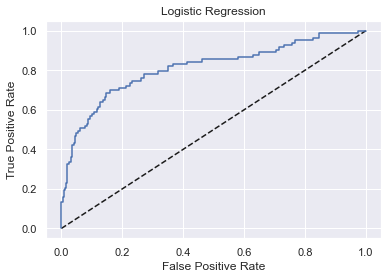

In [53]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

y_pred_prob=LR.predict_proba(x_test)[:,1]
y_pred_prob
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression")
plt.show()

### Random Forest Classification

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))   
print(classification_report(y_test,predrf))

0.8754045307443366
[[519  16]
 [ 61  22]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       535
           1       0.58      0.27      0.36        83

    accuracy                           0.88       618
   macro avg       0.74      0.62      0.65       618
weighted avg       0.85      0.88      0.85       618



In [55]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(rf,x,y,cv=5)   #cv for 5 split 
print("Corss validation scre for Random Forest", scr.mean())

Corss validation scre for Random Forest 0.8537414965986395


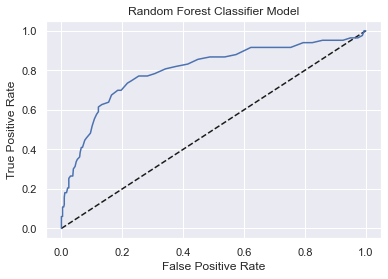

In [56]:
y_pred_prob=rf.predict_proba(x_test)[:,1]
y_pred_prob
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest Classifier Model")
plt.show()

### KNeighborsClassifier

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.6310679611650486
[[336 199]
 [ 29  54]]
              precision    recall  f1-score   support

           0       0.92      0.63      0.75       535
           1       0.21      0.65      0.32        83

    accuracy                           0.63       618
   macro avg       0.57      0.64      0.53       618
weighted avg       0.83      0.63      0.69       618



In [58]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(knn,x,y,cv=5)   #cv for 5 split 
print("Corss validation scre for Knearest Neigbour Classification", scr.mean())

Corss validation scre for Knearest Neigbour Classification 0.8510204081632654


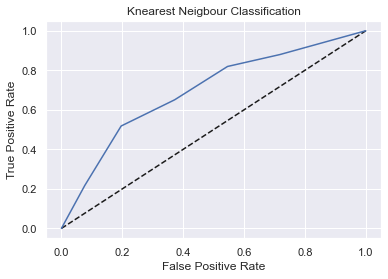

In [59]:
y_pred_prob=knn.predict_proba(x_test)[:,1]
y_pred_prob
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Knearest Neigbour Classification")
plt.show()

### Support Vector Classifier

In [61]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train,y_train)
predsv = sv.predict(x_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))   
print(classification_report(y_test,predsv))

0.8284789644012945
[[474  61]
 [ 45  38]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       535
           1       0.38      0.46      0.42        83

    accuracy                           0.83       618
   macro avg       0.65      0.67      0.66       618
weighted avg       0.84      0.83      0.83       618



In [62]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(sv,x,y,cv=2)   #cv for 2 split 
print("Corss validation scre for support vector", scr.mean())

Corss validation scre for support vector 0.8612244897959184


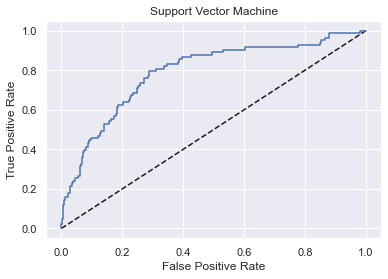

In [63]:
#model = SVC()
sv.probability = True
sv.fit(x_train,y_train)
y_pred_prob=sv.predict_proba(x_test)[:,1]
y_pred_prob
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Support Vector Machine")
plt.show()

### AdaBoost Classification

In [64]:
from sklearn.ensemble import AdaBoostClassifier
ad= AdaBoostClassifier()
ad.fit(x_train,y_train)
predad = ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.8446601941747572
[[480  55]
 [ 41  42]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       535
           1       0.43      0.51      0.47        83

    accuracy                           0.84       618
   macro avg       0.68      0.70      0.69       618
weighted avg       0.86      0.84      0.85       618



In [65]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(ad,x,y,cv=5)   #cv for 5 split 
print("Corss validation scre for ADaboost", scr.mean())

Corss validation scre for ADaboost 0.8693877551020408


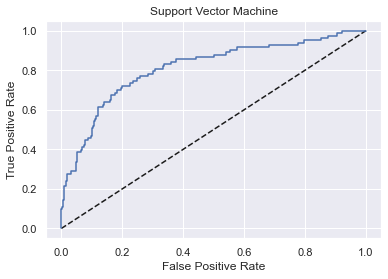

In [66]:
ad.probability = True
ad.fit(x_train,y_train)
y_pred_prob=ad.predict_proba(x_test)[:,1]
y_pred_prob
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Support Vector Machine")
plt.show()

# Compare Model Performance

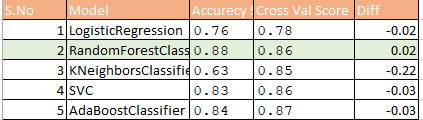

## Best Model is Random Search Classification as it is giving highest  88% accuracy and cross validation score is also 86% cross val score.

We will try to figureout it best parameter so that we can increase its score in cross validation as well.

In [67]:
from sklearn.model_selection import GridSearchCV
#Apply Random SearchCV for Random Forest Model
parameters = {"n_estimators":[100,200,500], "criterion":["gini","entropy"],
              "max_depth":[3,6,8,25],"min_samples_split":[5,10,12,18]
            ,"max_features":['auto', 'sqrt'],"min_samples_leaf":[5,6,7,8] }
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.50,random_state=120)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = GridSearchCV(rf, parameters, cv = 4, verbose=2, n_jobs = -1)
# Fit the random search model

result=rf_random.fit(x_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 4 folds for each of 768 candidates, totalling 3072 fits
Best Score: 0.8489768947493466
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 200}


In [68]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini', max_depth= 25, max_features= 'sqrt', min_samples_leaf= 5, min_samples_split= 10, n_estimators= 200)
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))   
print(classification_report(y_test,predrf))

0.8639455782312925
[[617   7]
 [ 93  18]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       624
           1       0.72      0.16      0.26       111

    accuracy                           0.86       735
   macro avg       0.79      0.58      0.59       735
weighted avg       0.85      0.86      0.83       735



# Saving Best Model

In [69]:
import joblib 
joblib.dump(rf,'HR-Employee-Attrition.pki')

['HR-Employee-Attrition.pki']

In [70]:
model = joblib.load('HR-Employee-Attrition.pki')

In [71]:
prediction = model.predict(x_test)

In [72]:
prediction = pd.DataFrame(prediction)  #Converting into Data Frame

In [73]:
prediction.to_csv('Result.csv')

In [74]:
pd.set_option('display.max_row',None)
y_test

1002    0
384     0
968     0
1299    0
813     1
694     0
1100    0
1368    0
1070    0
745     0
614     1
604     0
1423    0
95      0
461     0
1077    1
184     0
1112    1
1237    1
1441    0
579     0
1214    0
605     0
295     0
525     1
1020    0
76      0
1151    0
1263    0
958     0
325     0
1309    0
1384    0
1363    0
121     0
29      0
354     0
1134    0
367     0
784     0
998     0
455     0
492     0
1382    0
642     0
702     0
79      0
516     0
1397    0
1128    0
1030    0
874     0
1355    0
853     0
273     0
1191    0
380     0
907     0
481     0
985     1
864     1
1097    0
363     1
695     1
800     1
795     0
725     1
176     0
237     0
1387    0
1075    0
204     1
685     0
328     0
1118    0
510     0
993     0
1258    0
1343    0
1215    0
395     0
271     1
451     0
705     0
742     0
85      0
552     0
943     0
1014    0
1204    1
357     1
827     0
727     0
517     0
972     0
47      0
1176    0
900     0
823     0
509     0
